### Подключение библиотек

In [31]:
import nibabel as nib
import matplotlib.pyplot as plt
import os

import numpy as np
import cv2

### Превращаем КТ в набор слайсов

In [32]:
CT_PATH_FILE = os.path.join("assets", "input.nii.gz")
CT_SLICES_DIR = os.path.join("output", "slices")

if not os.path.exists(CT_SLICES_DIR):
  os.mkdir(CT_SLICES_DIR)

In [33]:
nii_path = CT_PATH_FILE

nii_img = nib.load(nii_path)

nii_data = nii_img.get_fdata()

output_dir = CT_SLICES_DIR

In [34]:
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)
#
# for i in range(nii_data.shape[2]):
#     plt.imshow(nii_data[:, :, i], cmap="gray")
#     plt.axis("off")
#     plt.savefig(os.path.join(output_dir, f"slice_{i}.png"), bbox_inches="tight", pad_inches=0)
#     plt.clf()

### Анализируем контуры на слайсе

In [35]:
INPUT_FILE = os.path.join(CT_SLICES_DIR, "slice_125.png")
OUTPUT_FILE = os.path.join("output", "contoured_slice.png")

Смотрим на разные tresholds

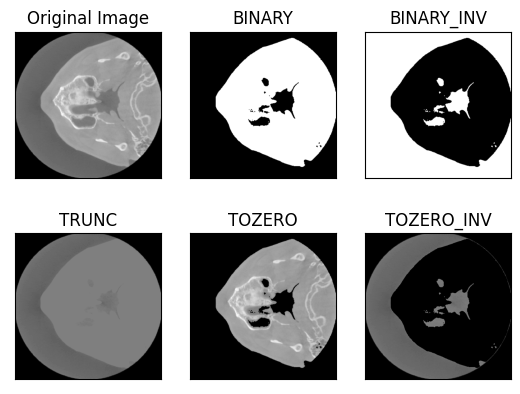

In [36]:
img = cv2.imread(INPUT_FILE, cv2.IMREAD_GRAYSCALE)

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Выделяем контуры

In [37]:
img = cv2.imread(INPUT_FILE)

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower = np.array([0, 0, 70])
upper = np.array([179, 179, 130])
mask = cv2.inRange(img_hsv, lower, upper)

# cv2.imshow("Image", mask)

mask_blur = cv2.GaussianBlur(mask, (3, 3), 1)
_, thresh = cv2.threshold(mask_blur, 200, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(img, contours, -1, (255, 0, 0), 3)
cv2.imwrite(OUTPUT_FILE, img)

True

In [38]:
t1=cv2.findContours(thresh4, mode=cv2.RETR_CCOMP , method=cv2.CHAIN_APPROX_SIMPLE)

In [39]:
cont = t1[0]
maxc = max(enumerate(t1[0]), key=lambda x: cv2.contourArea(x[1]))[0]
img = thresh
img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)

cv2.drawContours(img, cont, maxc, (125, 125, 0), 3)
cv2.imwrite(f'OUTPUT_FILE_1_1.png', img)

True

In [40]:
ch = cv2.convexHull(cont[maxc])
ch_ = cv2.convexHull(cont[maxc], returnPoints=False)
cv2.drawContours(img, ch, -1, (0, 0, 255), 3)
cv2.imwrite(f'OUTPUT_FILE_1_2.png', img)

True

In [41]:
cv2.convexityDefects(cont[maxc],ch_)

array([[[   0,    2,    1,  186]],

       [[   2,   44,   33,  435]],

       [[  44,   46,   45,  162]],

       [[  46,   52,   47,  191]],

       [[  52,   60,   53,  176]],

       [[  60,   70,   61,  231]],

       [[  70,   72,   71,  160]],

       [[  72,   74,   73,  170]],

       [[  75,   77,   76,  173]],

       [[  77,   81,   80,  216]],

       [[  81,  105,   98,  508]],

       [[ 105,  107,  106,  142]],

       [[ 107,  117,  108,  114]],

       [[ 118,  120,  119,  162]],

       [[ 120,  124,  121,  114]],

       [[ 124,  162,  131, 1522]],

       [[ 162,  164,  163,  154]],

       [[ 164,  166,  165,  169]],

       [[ 167,  169,  168,  170]],

       [[ 169,  173,  170,  142]],

       [[ 173,  185,  180,  217]],

       [[ 185,  187,  186,  114]],

       [[ 187,  247,  198,  629]],

       [[ 247,  251,  248,  190]],

       [[ 251,  257,  252,  162]],

       [[ 257,  263,  258,  221]],

       [[ 263,  265,  264,  201]],

       [[ 265,  269,  266,  

In [42]:
ch

array([[[261,  15]],

       [[264,  16]],

       [[274,  21]],

       [[281,  25]],

       [[296,  35]],

       [[308,  45]],

       [[324,  61]],

       [[329,  67]],

       [[333,  72]],

       [[336,  76]],

       [[344,  88]],

       [[348,  95]],

       [[356, 111]],

       [[358, 116]],

       [[359, 119]],

       [[363, 132]],

       [[366, 142]],

       [[368, 151]],

       [[368, 217]],

       [[366, 226]],

       [[363, 236]],

       [[359, 249]],

       [[358, 252]],

       [[356, 257]],

       [[348, 273]],

       [[344, 280]],

       [[338, 289]],

       [[329, 301]],

       [[325, 306]],

       [[307, 324]],

       [[287, 339]],

       [[285, 340]],

       [[280, 340]],

       [[262, 338]],

       [[257, 337]],

       [[247, 334]],

       [[238, 331]],

       [[233, 329]],

       [[156, 298]],

       [[154, 297]],

       [[138, 287]],

       [[132, 283]],

       [[123, 275]],

       [[119, 271]],

       [[112, 263]],

       [[1

In [43]:
sum(map(lambda x: x[0][3], cv2.convexityDefects(cont[maxc],ch_)))

16054

In [44]:
from itertools import *


In [45]:
max(enumerate(t1[0]), key=lambda x: cv2.contourArea(x[1]))

(2,
 array([[[255,  15]],
 
        [[254,  16]],
 
        [[251,  16]],
 
        [[250,  17]],
 
        [[248,  17]],
 
        [[247,  18]],
 
        [[245,  18]],
 
        [[244,  19]],
 
        [[243,  19]],
 
        [[242,  20]],
 
        [[239,  20]],
 
        [[238,  21]],
 
        [[236,  21]],
 
        [[235,  22]],
 
        [[233,  22]],
 
        [[232,  23]],
 
        [[230,  23]],
 
        [[229,  24]],
 
        [[227,  24]],
 
        [[226,  25]],
 
        [[224,  25]],
 
        [[223,  26]],
 
        [[222,  26]],
 
        [[221,  27]],
 
        [[219,  27]],
 
        [[218,  28]],
 
        [[216,  28]],
 
        [[215,  29]],
 
        [[213,  29]],
 
        [[212,  30]],
 
        [[210,  30]],
 
        [[209,  31]],
 
        [[208,  31]],
 
        [[207,  32]],
 
        [[204,  32]],
 
        [[203,  33]],
 
        [[201,  33]],
 
        [[200,  34]],
 
        [[198,  34]],
 
        [[197,  35]],
 
        [[195,  35]],
 
        [[19

In [46]:
result = []
result1 = []
for i in range(nii_data.shape[2]):
    try:
        INPUT_FILE = os.path.join(CT_SLICES_DIR, f"slice_{i}.png")
        data = cv2.imread(INPUT_FILE, cv2.IMREAD_GRAYSCALE)
        data=cv2.bilateralFilter(data, 3,75,75)
        # _, thresh = cv2.threshold(data,100,255,cv2.THRESH_TOZERO)
        _, thresh = cv2.threshold(data,data.mean(),255,cv2.THRESH_TOZERO)
        # thresh = cv2.adaptiveThreshold(data,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5,2)
        cont, _ =cv2.findContours(thresh, mode=cv2.RETR_EXTERNAL , method=cv2.CHAIN_APPROX_SIMPLE)
        maxc = max(enumerate(cont), key=lambda x: cv2.contourArea(x[1]))[0]
        ch = cv2.convexHull(cont[maxc], returnPoints=False)

        ch_ = cv2.convexHull(cont[maxc])
        t1 = sum(map(lambda x: x[0][3], cv2.convexityDefects(cont[maxc],ch)))
        t2 = cv2.contourArea(ch_) - cv2.contourArea(cont[maxc])
        result.append(t1)
        result1.append(t2)
    except Exception as e:
        print(e)
        result.append(-1)
        result1.append(-1)

OpenCV(4.9.0) /io/opencv/modules/imgproc/src/convhull.cpp:359: error: (-5:Bad argument) The convex hull indices are not monotonous, which can be in the case when the input contour contains self-intersections in function 'convexityDefects'

OpenCV(4.9.0) /io/opencv/modules/imgproc/src/convhull.cpp:359: error: (-5:Bad argument) The convex hull indices are not monotonous, which can be in the case when the input contour contains self-intersections in function 'convexityDefects'



In [47]:
res1 = np.array(result1)
res = np.array(result)

In [48]:
tr = res.mean()
tr1=res1.mean()
tr, tr1

(17703.053941908714, 1658.2697095435685)

In [54]:
tr = np.quantile(res,0.7)
tr1=np.quantile(res1,0.7)
tr, tr1

(19652.0, 1957.0)

(array([7., 7., 8., 7., 7., 8., 7., 7., 6., 8.]),
 array([149. , 156.4, 163.8, 171.2, 178.6, 186. , 193.4, 200.8, 208.2,
        215.6, 223. ]),
 <BarContainer object of 10 artists>)

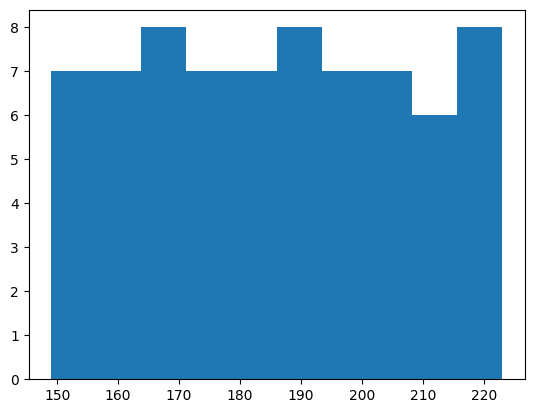

In [55]:
plt.hist(np.where(res>tr))

(array([8., 7., 8., 7., 8., 7., 8., 6., 6., 7.]),
 array([148. , 155.5, 163. , 170.5, 178. , 185.5, 193. , 200.5, 208. ,
        215.5, 223. ]),
 <BarContainer object of 10 artists>)

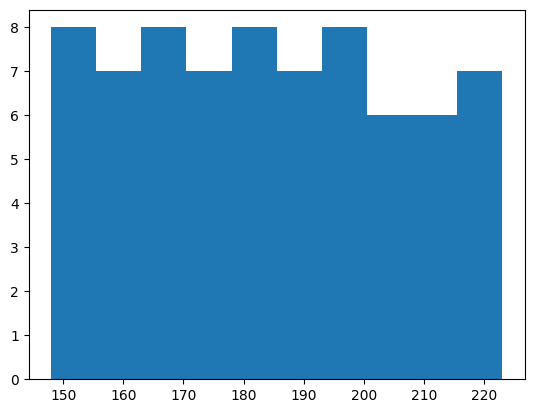

In [56]:
plt.hist(np.where(res1>tr1))

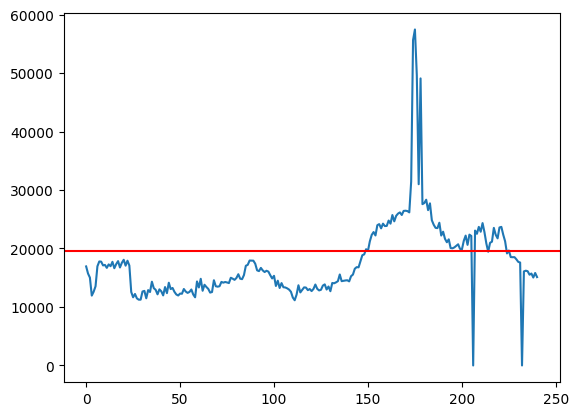

In [57]:
plt.plot(res)
plt.axhline(tr,color='r')

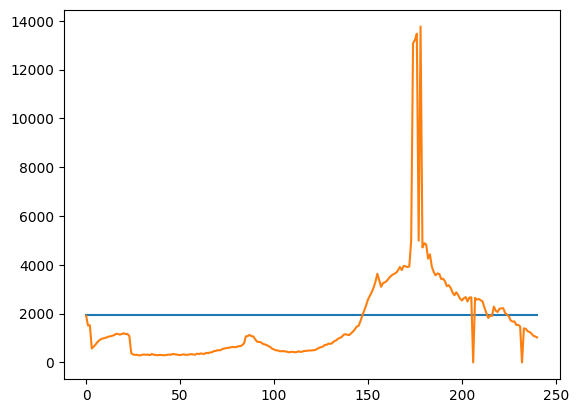

In [58]:
plt.plot(list(zip(repeat(tr1, res.shape[0]),res1)))

In [60]:
np.argmax(res>tr)

149

In [62]:
np.argwhere(np.diff(np.sign(res1 - tr1))).flatten()

array([147, 205, 206, 213, 216, 223, 224])

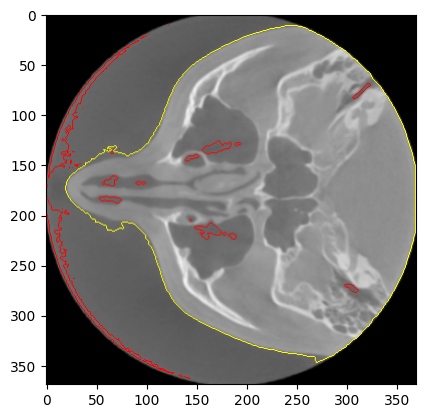

In [259]:
INPUT_FILE = os.path.join(CT_SLICES_DIR, f"slice_172.png")
data = cv2.imread(INPUT_FILE, cv2.IMREAD_GRAYSCALE)
data=cv2.bilateralFilter(data, 3,75,75)
_, thresh = cv2.threshold(data,data.mean(),255,cv2.THRESH_TOZERO)
# thresh = cv2.adaptiveThreshold(data,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5,2)
cont, _ =cv2.findContours(thresh, mode=cv2.RETR_CCOMP , method=cv2.CHAIN_APPROX_SIMPLE)
maxc = max(enumerate(cont), key=lambda x: cv2.contourArea(x[1]))[0]
ch = cv2.convexHull(cont[maxc], returnPoints=False)
ch_ = cv2.convexHull(cont[maxc])

img = cv2.cvtColor(data,cv2.COLOR_GRAY2RGB)

cv2.drawContours(img, cont,-1,(255,0,0))
cv2.drawContours(img, cont,maxc,(255,255,0))
plt.imshow(img)

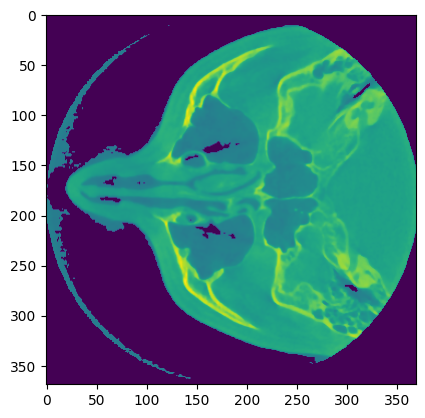

In [257]:
plt.imshow(thresh)

In [207]:
np.quantile(res,0.4)

13623.0

In [116]:
data.mean()

100.70446016113277

In [245]:
np.argmax(res), np.argmax(res1)

(172, 174)